In [1]:
import os
os.chdir('/Users/lphan/Documents/Spotify')

In [2]:
# Packages
# For Cleaning and basic functions
import pandas as pd
import numpy as np
import requests
import json

# Connecting to Spotify API
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# For Machine Learning
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from PIL import Image
import matplotlib.pyplot as plt

In [123]:
# Load data
mood_data = pd.read_csv('mood_data.csv')
user_data = pd.read_csv('AudioFeaturesTable.csv')

In [124]:
# import numpy
mood_data = mood_data[~(mood_data['vibe'] == 'angry')]


In [125]:

# Drops NAs so it can be put into the sklearn model
train_data = mood_data.dropna()
user_data = user_data.dropna()

In [126]:
user_data

,Unnamed: 0,track_uri,popularity,danceability,energy,loudness,valence,acousticness,speechiness,instrumentalness,tempo
0,0,4rPJSqrov3zqGwXlemLBMw,77,0.435,0.768,-5.352,0.378,0.0857,0.2010,0.000231,107.588
1,1,69EwGs863aPS8olgCWtZ8J,41,0.632,0.349,-11.491,0.299,0.5970,0.0309,0.000000,148.009
2,2,2sOj9vyd6yiss9W1IK6chU,66,0.420,0.725,-4.262,0.186,0.0920,0.2230,0.000000,77.941
3,3,0F2gUQwJsy8iCfYv3uDgCp,0,0.600,0.326,-9.091,0.214,0.8430,0.0281,0.000000,84.996
4,4,1SGt65i9AnXYdDQt1AtDRH,67,0.773,0.595,-6.062,0.338,0.1140,0.1610,0.000002,123.968
...,...,...,...,...,...,...,...,...,...,...,...
332,332,4Ba99csVDlRFQILO5cSi7I,31,0.340,0.255,-13.713,0.460,0.8820,0.0611,0.000064,67.905
333,333,3CRDbSIZ4r5MsZ0YwxuEkn,86,0.734,0.637,-5.677,0.648,0.0462,0.1410,0.000023,169.977
334,334,5oDMahI0iti1HG9RBzzlHS,32,0.733,0.432,-9.624,0.673,0.4950,0.0292,0.000000,95.988
335,335,4MdDjLdv6rLf53WltCDBhW,32,0.803,0.835,-4.550,0.531,0.3180,0.0689,0.015100,98.987


In [127]:
mood_data

,Unnamed: 0,artist,album,track_name,track_id,danceability,energy,key,loudness,mode,...,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,acousticness,popularity,album_release_date,vibe
0,0,Miley Cyrus,Flowers,Flowers,0yLdNVWF3Srea0uzk55zFn,0.707,0.681,0,-4.325,1,...,0.000005,0.0322,0.646,117.999,200455,4,0.06320,98.0,2023-01-13,upbeat
1,1,Rema,Calm Down (with Selena Gomez),Calm Down (with Selena Gomez),0WtM2NBVQNNJLh6scP13H8,0.801,0.806,11,-5.206,1,...,0.000669,0.1140,0.802,106.999,239318,4,0.38200,95.0,2022-08-25,upbeat
2,2,David Guetta,I'm Good (Blue),I'm Good (Blue),4uUG5RXrOk84mYEfFvj3cK,0.561,0.965,7,-3.673,0,...,0.000007,0.3710,0.304,128.040,175238,4,0.00383,94.0,2022-08-26,upbeat
3,3,Stephen Sanchez,Until I Found You (Em Beihold Version),Until I Found You (with Em Beihold) - Em Beiho...,1Y3LN4zO1Edc2EluIoSPJN,0.551,0.550,10,-5.339,1,...,0.000000,0.2020,0.342,101.190,176440,3,0.77700,93.0,2022-04-22,upbeat
4,4,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,4h9wh7iOZ0GGn8QVp4RAOB,0.704,0.797,0,-5.927,1,...,0.000745,0.0546,0.825,139.994,148486,4,0.08260,93.0,2022-05-13,upbeat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2774,2774,Joy Crookes,Don't Let Me Down (Demo),Don't Let Me Down - Demo,1VwPTHAfPvcL1ZubK6qabL,0.696,0.140,9,-11.509,1,...,0.000354,0.1480,0.203,80.831,195535,3,0.81800,54.0,2018-11-29,chill
2775,2775,Lee Fields & The Expressions,My World,Honey Dove,1emxi7e5EWFsJmwSKTuUDH,0.487,0.497,4,-5.776,0,...,0.167000,0.1090,0.195,160.317,246573,4,0.12400,53.0,2009-06-02,chill
2776,2776,Charlotte Day Wilson,ALPHA,Mountains,4JvEicQI7CxOJxuI0xtpim,0.540,0.399,10,-9.127,1,...,0.023900,0.3680,0.141,117.976,249334,4,0.77000,53.0,2021-07-09,chill
2777,2777,Raveena,Shanti,Love Child,7xlhCrF1qme2kFUmynnaQq,0.907,0.338,7,-10.944,1,...,0.032200,0.0418,0.848,95.989,163072,4,0.45400,53.0,2017-12-06,chill


In [132]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn import preprocessing


# subset the relevant columns
mood_features = mood_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity','acousticness']]
user_features = user_data[['valence', 'danceability', 'tempo', 'energy','loudness','speechiness','instrumentalness','popularity','acousticness']]

# scale audio features to standardize the metrics
scaler = preprocessing.MinMaxScaler()
mood_features_scaled = pd.DataFrame(scaler.fit_transform(mood_features), columns=mood_features.columns)
user_features_scaled = pd.DataFrame(scaler.fit_transform(user_features), columns=user_features.columns)

mood_target = mood_data['vibe']

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(mood_features_scaled, mood_target, test_size=0.2, random_state=42)

# create a logistic regression model and train it
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500)
logreg.fit(X_train, y_train)

# make predictions on the user data
user_pred = logreg.predict(user_features_scaled)

# calculate the accuracy of the model on the test set
y_pred = logreg.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("The accuracy of the model is:", accuracy)


The accuracy of the model is: 0.7284172661870504


In [133]:
len(user_pred)

337

In [134]:

# print the predicted mood
# print("The user's predicted mood is:", user_pred[0])

# calculate the accuracy of the model on the test set

print("The accuracy of the model is:", accuracy)

total = len(user_pred)
upbeat_count = np.count_nonzero(user_pred == 'upbeat')
upbeat_per = round((upbeat_count / total) * 100)

sad_count = np.count_nonzero(user_pred == 'sad')
sad_per = round((sad_count / total) * 100)

chill_count = np.count_nonzero(user_pred == 'chill')
chill_per = round((chill_count / total) * 100)

print("Upbeat percent:", upbeat_per, "%")
print("Sad percent:", sad_per , "%")
print("Chill percent:", chill_per, "%")

The accuracy of the model is: 0.7284172661870504
Upbeat percent: 30 %
Sad percent: 8 %
Chill percent: 62 %


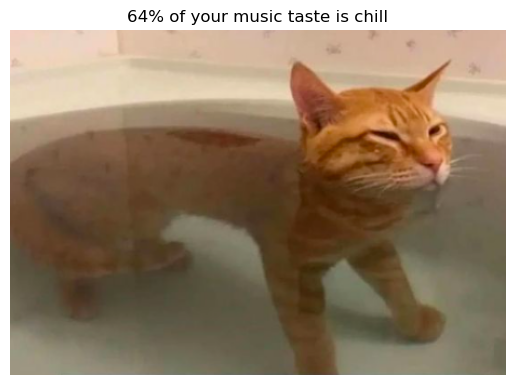

In [131]:
# Find the highest percentage
max_percent = max(upbeat_per, sad_per, chill_per)

# Define image filenames
upbeat_image = 'upbeat_img.jpg'
sad_image = 'sad_img.jpg'
chill_image = 'chill_img.jpg'

# Find the highest percentage category
max_per = max(upbeat_per, sad_per, chill_per)
if max_per == upbeat_per:
    image_file = upbeat_image
    category = 'upbeat'
elif max_per == sad_per:
    image_file = sad_image
    category = 'sad'
else:
    image_file = chill_image
    category = 'chill'

# Load and display the image
image = plt.imread(image_file)
plt.imshow(image)
plt.axis('off')
plt.title(f"{max_per}% of your music taste is {category}")
plt.show()
